# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.drop(columns=['Radio','Newspaper'],inplace=True,axis=1)

In [7]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [8]:
df.shape

(200, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [11]:
x =x.reshape(-1,1)
y =y.reshape(-1,1)

Text(0, 0.5, 'Sales')

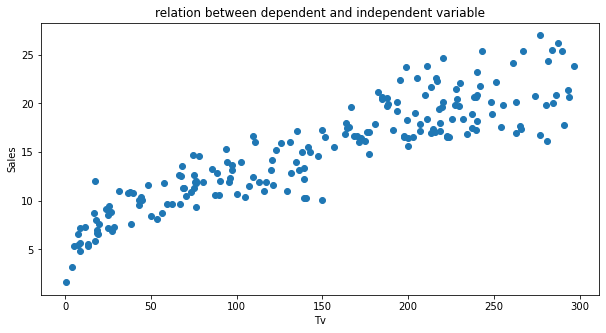

In [12]:
plt.figure(figsize = (10,5))
plt.scatter(x,y,norm=True)
plt.title('relation between dependent and independent variable')
plt.xlabel('Tv')
plt.ylabel('Sales')

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [14]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
r2_score(y_test,y_pred)

0.802561303423698

In [17]:
mean_absolute_error(y_test,y_pred)

1.9502948931650088

In [18]:
mean_squared_error(y_test,y_pred)

6.101072906773964

In [19]:
model.intercept_

array([7.00710843])

In [20]:
model.coef_

array([[0.05548294]])

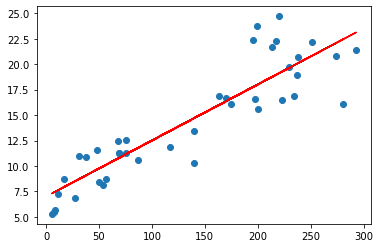

In [21]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.007 + 0.055 * x_test, 'r')
plt.show()

In [22]:
y_predicted = pd.DataFrame(y_pred)
y_actual = pd.DataFrame(y_test)

In [23]:
new_df = pd.concat([y_predicted,y_actual],axis = 1)

In [24]:
new_df.columns = ['Predicted','Actual']

In [25]:
new_df.head()

,Predicted,Actual
0,16.067473,16.9
1,17.848476,22.4
2,23.258063,21.4
3,7.656259,7.3
4,19.230001,24.7
